# 🐕 End-to-end multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and Tensorflow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog. 

## 2. Data

The data we are using is from Kaggle: https://www.kaggle.com/c/dog-breed-identification/overview

## 3. Evluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features

Some information about the data:
* we are dealing with images (unstructured data) so it is probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* there are around 10,000+ images in the training set (these images have labels).
* there are around 10,000+ images in the test set (these images have no labels, because we will want to predict them).

In [ ]:
# unzip the uploaded data into Google Drive
# !unzip "/content/drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/Dog Vision/"

### Get our Workspace Ready

* import Tensorflow 2.x ✅
* import TensorFlow Hub ✅
* make sure we are using a GPU ✅

In [ ]:
# import TensorFlow and Hub into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version: ", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "avaiable (YES!!)" if tf.config.list_physical_devices("GPU") else "not available")

TF version:  2.11.0
TF Hub version: 0.12.0
GPU avaiable (YES!!)


## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we will be dping first. Turning images into Tensors (numerical representations).

Let's start by accessing our data and checking out the labels.

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<AxesSubplot:>

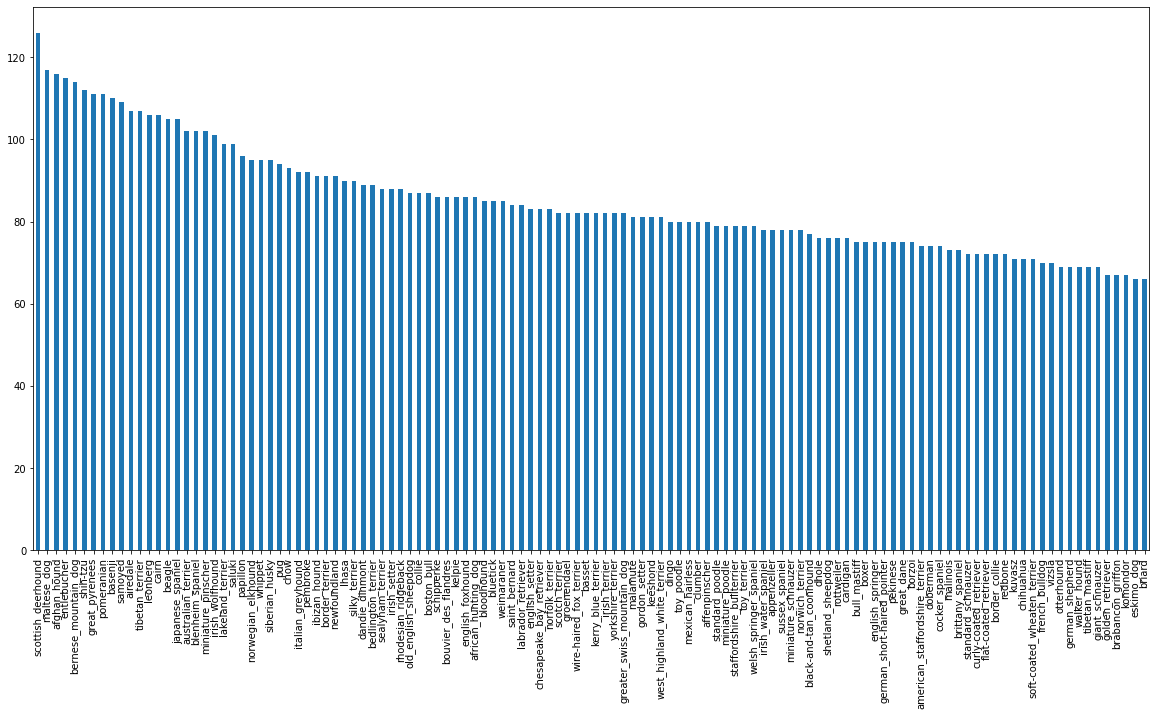

In [ ]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

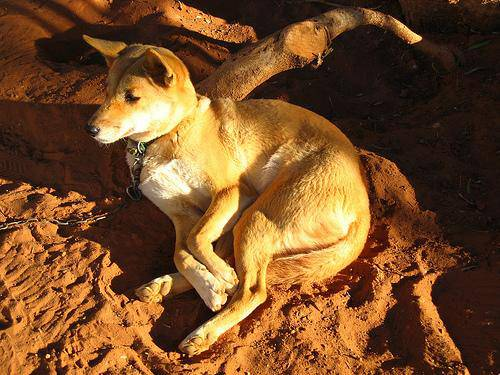

In [ ]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all of our file pathnames.

In [ ]:
# Create a pathname from image ID's
filenames = ["/content/drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['/content/drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!! Proceed.")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!! Proceed.


In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels mateches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check the data directories!")

Number of labels mateches number of filenames!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example: turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set, we are going to create our own. 

In [ ]:
# Setup X & y variables
X = filenames
y = boolean_labels

We are going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 3000 #@param {type: "slider", min: 1000, max:10000, step:1000}

In [ ]:
# Let's split our data into trian and validation sets
from sklearn.model_selection import train_test_split

# split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2, 
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(2400, 600, 2400, 600)

In [ ]:
# Let's have a geez at the training data
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/Dog Vision/train/0fb1454104deee316f52244bb2037b37.jpg',
  '/content/drive/MyDrive/Dog Vision/train/113ef2bb9e14d89f927314f73d573313.jpg',
  '/content/drive/MyDrive/Dog Vision/train/053106ed091eac5e129225315ef6cfcb.jpg',
  '/content/drive/MyDrive/Dog Vision/train/2a26dd719f6ab87fc13eb834d9a9f8e6.jpg',
  '/content/drive/MyDrive/Dog Vision/train/18de05937a44cb467b229889f8a95bcb.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we are going to write a function which does a few things:

1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable. `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224, 224)
6. Return modified `image`

Before we do, let's see what importing an image looks like.

In [ ]:
# Convert image to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
# Turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function preprocessing images
def process_img(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 color channels (Red, Green Blue)
  ts_image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  converted_image = tf.image.convert_image_dtype(ts_image, tf.float32)
  # Resize the image to our desired value (244, 244)
  shaped_image = tf.image.resize(converted_image, size=[IMG_SIZE, IMG_SIZE])

  return shaped_image

## Turning our data into batches

Why turn our data into batches?

Let's say you are trying to process 10,000+ images in one go, they all might not fit into memory.

So that's why we do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use Tensorflow effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`.

In [ ]:
# Create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label, processes the image and returns a tuple of (image, label).
  """
  image = process_img(image_path)
  return image, label

In [ ]:
# Demo of the above
(process_img(X[42], tf.constant(y[42])))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117757],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

Now we have got a way to turn our data into tuples of Tensors in the form: `(image, label)`, let's make a function to turn all of our data (`X` & `y`) into batches!

In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of imamge (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it is validation data.
  Also accepts test data as inout (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(X)) # only filepath (no labels)
    data_batch = data.map(process_img).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  
  else: 
    print("Creating training data batches...")
    # Trun filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image, label) tuples (this also turns the image path into a preprocessed iamge)
    data = data.map(get_image_label)
    # Trun the training data into batches
    data_batch  = data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)

val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches , these can be a little hard to understand/comprehend, let's visualize the batches.

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # add the image label
    plt.title(unique_breeds[labels[i].argmax()])
    # Trun the grid lines off
    plt.axis("off")


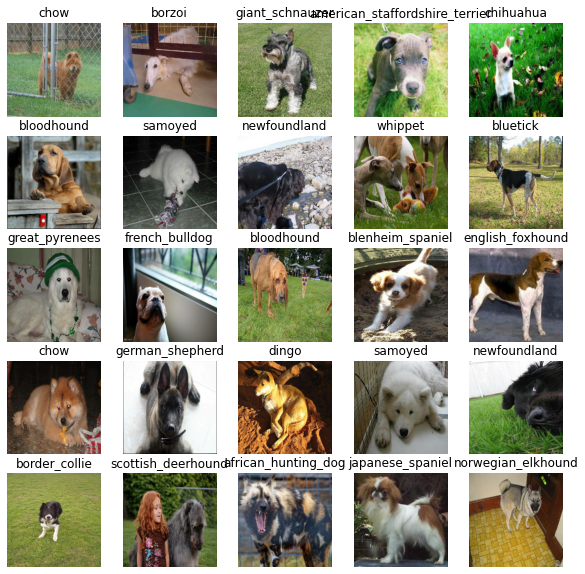

In [ ]:
# Now let's visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

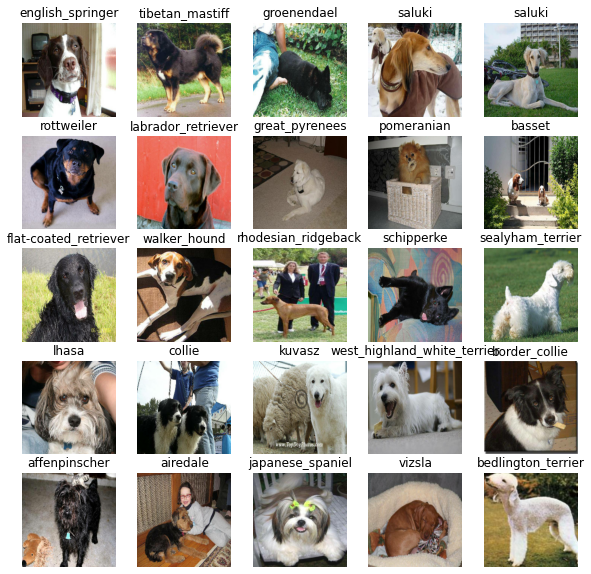

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

Before we build a model, there are few things we need to define:

* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use from TensorFlow Hub- https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5.

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chose as parameters.
* Defines the layers in a Kearas model in sequential fashion (do this first, then this then that).
* Comfiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers (defining the model)
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                     activation="softmax") # layer 2 (output layer)
                             ])
  # Compile the model (define how our model is going to learn)
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
  
  # Build the model
  model.build(INPUT_SHAPE)
  
  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stop improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

## TensorBaord Callback

To setup a TensorBoard callback, we need to do 3 things:

1. Load the TensorBoard notebook extension. ✅
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function. ✅
3. Visualize our models training logs with `%tebsirbaird` magic function (we'll do this after model training).

In [ ]:
# Load TensorBoard notebook extension

%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog Vision/logs",
                        # Make it so the logs get tracked whenever we run an experiement
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stopping our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is working.

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, steps:10}

In [ ]:
# Check to make sure we are still running on a GPU
print("GPU", "available? (Yes!)" if tf.config.list_physical_devices("GPU") else "not avaialbe")

GPU available? (Yes!)


Let's create a function which trains a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (*NUM_EPOCHS*) and the callbacks we'd like to use
* Return the model

In [ ]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  
  # Return the fitted model
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
75/75 [==============================] - 205s 2s/step - loss: 2.9540 - accuracy: 0.3692 - val_loss: 1.2896 - val_accuracy: 0.6783
Epoch 2/100
75/75 [==============================] - 11s 145ms/step - loss: 0.6027 - accuracy: 0.8671 - val_loss: 0.9027 - val_accuracy: 0.7517
Epoch 3/100
75/75 [==============================] - 9s 125ms/step - loss: 0.2636 - accuracy: 0.9596 - val_loss: 0.8289 - val_accuracy: 0.7550
Epoch 4/100
75/75 [==============================] - 9s 114ms/step - loss: 0.1480 - accuracy: 0.9871 - val_loss: 0.7852 - val_accuracy: 0.7600
Epoch 5/100
75/75 [==============================] - 11s 147ms/step - loss: 0.0954 - accuracy: 0.9962 - val_loss: 0.7794 - val_accuracy: 0.7583
Epoch 6/100
75/75 [==============================] - 11s 144ms/step - loss: 0.0675 - accuracy: 0.9987 - val_loss: 0.7510 - val_accuracy: 0.7683
Epoch 7/100
75/75 [============================

**Question:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset, what are some ways to prevent overfitting in deep learning neural networks?

**Note:** Overfitting to begin with is good thing! It means our model is learning!

### Checking the Tensorbaord logs

The TensorBoard magic function (`%tensorbaord`) will access the logs directory we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir "/content/drive/MyDrive/Dog Vision/logs"

<IPython.core.display.Javascript object>

## Making and Evaluating Predictions Using a Trained Model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data,
                            verbose=1)
predictions

19/19 [==============================] - 2s 91ms/step


array([[1.3548312e-06, 6.1044175e-06, 2.6385774e-06, ..., 6.9934977e-06,
        2.9412756e-06, 2.4325118e-07],
       [3.4213950e-05, 6.5903347e-05, 1.0823893e-06, ..., 1.4161839e-06,
        1.1114747e-06, 4.5616595e-08],
       [1.2365689e-05, 7.5626391e-05, 2.3725258e-06, ..., 9.3658909e-06,
        3.8502371e-06, 5.7775003e-07],
       ...,
       [1.4950173e-03, 4.6175192e-03, 1.0370125e-04, ..., 9.2254719e-03,
        3.8394563e-02, 2.0519996e-04],
       [3.2851617e-06, 1.2647899e-06, 7.8665795e-07, ..., 6.2463946e-06,
        1.7023701e-04, 2.0514597e-06],
       [1.6924949e-05, 4.0142540e-06, 3.6858145e-07, ..., 1.4473343e-03,
        5.7704714e-05, 7.6753977e-06]], dtype=float32)

In [ ]:
predictions.shape

(600, 120)

In [ ]:
len(y_val), len(unique_breeds)

(600, 120)

In [ ]:
# very closed to one cause of softmax function
np.sum(predictions[0]), np.sum(predictions[1])

(1.0, 0.99999994)

In [ ]:
# First prediction
index = 17
print(predictions[index])
print(f"Max value (probability of predition): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[5.53483446e-08 1.82165263e-06 2.87830630e-07 2.76551373e-06
 2.42489705e-06 1.87925934e-06 2.14001394e-09 6.28310346e-08
 1.28201478e-07 4.38757468e-07 2.12603736e-05 1.07076858e-06
 2.23331494e-06 5.49139531e-06 3.68363112e-06 5.87842862e-07
 4.93199186e-05 2.56042853e-07 1.07300893e-05 4.99549238e-08
 1.04135452e-07 2.52592116e-07 6.59306920e-08 1.10888143e-08
 1.31920865e-06 1.54703193e-05 2.28471375e-08 3.92936954e-06
 1.22523936e-03 1.13419581e-07 9.49437253e-06 3.50580121e-05
 3.03998581e-06 4.36355180e-07 2.22871517e-04 1.79895949e-07
 1.26537918e-06 8.42435202e-06 1.34099238e-07 1.89256383e-07
 2.32447036e-07 4.13791881e-08 8.42764712e-06 3.79625562e-04
 9.18043588e-06 8.25855864e-08 2.11693782e-06 4.86341548e-07
 1.00415691e-05 5.51630947e-05 3.37891237e-07 8.94579262e-06
 3.80407274e-03 1.44956317e-07 4.38611278e-06 9.97941470e-07
 1.35630046e-07 2.24940404e-08 8.99895440e-06 1.17781128e-05
 1.44220806e-07 9.30935755e-08 1.19260548e-07 1.84695091e-06
 6.84546251e-08 6.782091

In [ ]:
unique_breeds[66]

'kuvasz'

Having the above functionality is great but we want to be able to do it at scale and it would be even better if we could see the image the predictions is being made on!

**Note:** Prediction probabilities are also known as confidence levels.

In [ ]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[64])
pred_label

'irish_water_spaniel'

Now since our validation data is still in a batch dataset, we will have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels)

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns seperate arrays of images and labels.
  """
  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.41326207, 0.41718364, 0.3544385 ],
         [0.36937293, 0.3732945 , 0.31054938],
         [0.38238448, 0.38630605, 0.32356092],
         ...,
         [0.85572916, 0.8988664 , 0.9216594 ],
         [0.81720906, 0.8603463 , 0.8760326 ],
         [0.87009096, 0.9132282 , 0.9289145 ]],
 
        [[0.41238695, 0.41630852, 0.3535634 ],
         [0.40000004, 0.4039216 , 0.34117648],
         [0.40333864, 0.4072602 , 0.3445151 ],
         ...,
         [0.96608555, 0.9984034 , 0.9996638 ],
         [0.937802  , 0.98093927, 0.99544823],
         [0.9232422 , 0.95921254, 0.96534306]],
 
        [[0.41683942, 0.420761  , 0.35801587],
         [0.39275387, 0.39667544, 0.3339303 ],
         [0.4052726 , 0.40919417, 0.34644905],
         ...,
         [0.93628675, 0.9760188 , 0.98673296],
         [0.788624  , 0.8290739 , 0.8393855 ],
         [0.8861353 , 0.92658526, 0.93689686]],
 
        ...,
 
        [[0.3655635 , 0.25968117, 0.2322302 ],
         [0.38517138, 0.279289  , 0.25183

Now we've got ways to get:
* Prediction labels
* Validation labels (truth labels)
* Validation images

Let's make some functions to make these all a bit more visualize.

We'll create a function which:
* Takes an array of prediction probabilities, an array of truth labels and an array of images and interger. ✅
* Convert the prediction probabilities to a predicted label. ✅
* Plot the predicted label, its predicted probabilty, the truth label and the target image on a single plot. ✅

In [ ]:
# 
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the predictions is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"

  # Change plot title to be predicted, probability of predictions and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color=color)

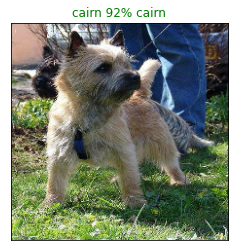

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* Find the prediction using `get_pred_label()`
* Find the top 10:
  * Prediction probabilties indexes
  * Prediction probabilties values
  * Prediction labels
* Plot top 10 prediction probability values and labels, coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """

  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

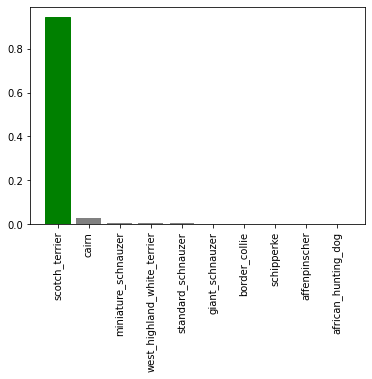

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=78)

Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few.

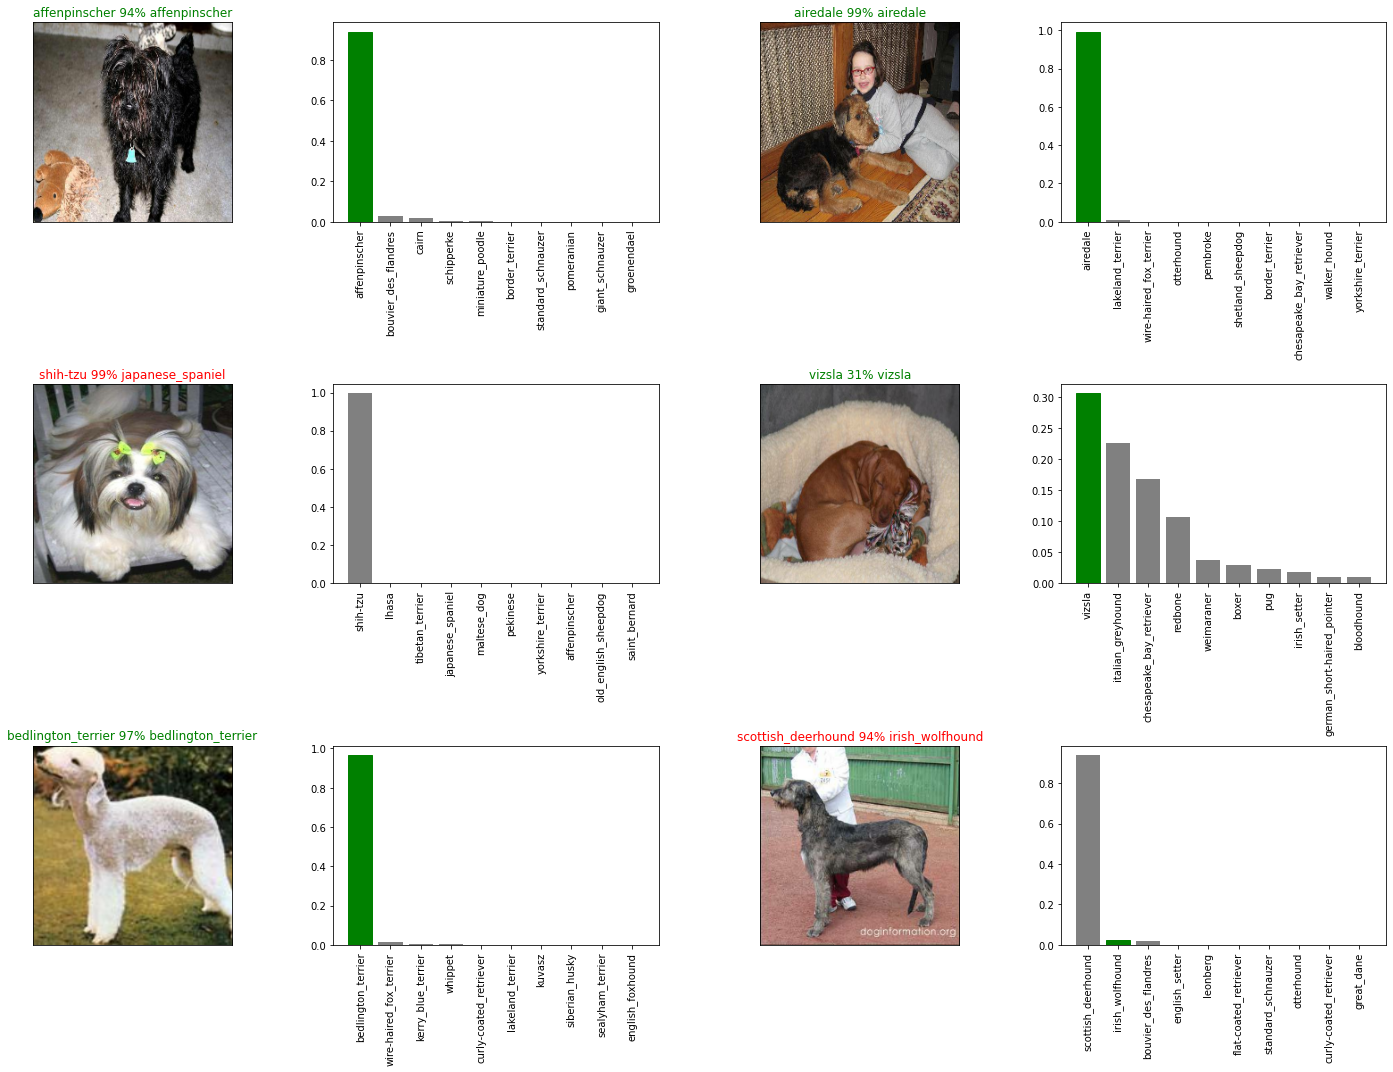

In [ ]:
# Let's check out a few predictions and their different values
i_mutiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_mutiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_mutiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and Reloading a Trained Model

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a gven model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

now we've got functions to save and load a trained model, let's make sure they work!

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/Dog Vision/models/20230224-18031677261780-1000-images-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog Vision/models/20230224-18031677261780-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Load a trained model
loaded_1000_images_model = load_model("/content/drive/MyDrive/Dog Vision/models/20230224-18031677261780-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: /content/drive/MyDrive/Dog Vision/models/20230224-18031677261780-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

19/19 [==============================] - 2s 87ms/step - loss: 0.7348 - accuracy: 0.7817


[0.7348176836967468, 0.7816666960716248]

In [ ]:
# Evaluate the loaded model
loaded_1000_images_model.evaluate(val_data)

19/19 [==============================] - 3s 104ms/step - loss: 0.7348 - accuracy: 0.7817


[0.7348176836967468, 0.7816666960716248]

## Training a Big Dog Model 🐕 (on the full data)

In [ ]:
# Create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

**Note:** Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we are using in the runtime has to load all of the images into memory.

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 39s 105ms/step - loss: 1.3472 - accuracy: 0.6677
Epoch 2/100
320/320 [==============================] - 33s 104ms/step - loss: 0.4055 - accuracy: 0.8784
Epoch 3/100
320/320 [==============================] - 34s 106ms/step - loss: 0.2377 - accuracy: 0.9377
Epoch 4/100
320/320 [==============================] - 34s 105ms/step - loss: 0.1547 - accuracy: 0.9619
Epoch 5/100
320/320 [==============================] - 33s 103ms/step - loss: 0.1077 - accuracy: 0.9780
Epoch 6/100
320/320 [==============================] - 34s 106ms/step - loss: 0.0784 - accuracy: 0.9864
Epoch 7/100
320/320 [==============================] - 35s 108ms/step - loss: 0.0582 - accuracy: 0.9922
Epoch 8/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0458 - accuracy: 0.9939
Epoch 9/100
320/320 [==============================] - 33s 104ms/step - loss: 0.0369 - accuracy: 0.9963
Epoch 10/100
320/320 [==============================] - 34s 106m

In [ ]:
save_model(full_model, suffix="full-model-set-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/Dog Vision/models/20230224-18271677263276-full-model-set-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog Vision/models/20230224-18271677263276-full-model-set-mobilenetv2-Adam.h5'

In [ ]:
# Load in the full model
loaded_full_model = load_model("/content/drive/MyDrive/Dog Vision/models/20230224-18271677263276-full-model-set-mobilenetv2-Adam.h5")

Loading saved model from: /content/drive/MyDrive/Dog Vision/models/20230224-18271677263276-full-model-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset

since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames ✅
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels)
* Make a predictions array by passing the test batches to the `predict()` method called on our model

In [ ]:
# Load test image filenames
test_path = "/content/drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Dog Vision/test/dda9df5ec2de82082127c99052fd077b.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e292584f17fa7cea7f95bdadecde0ebb.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e1e7949f64ff3283a5dafa9d39199193.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e3a7aeb038b8abd3f8ed910c84504efc.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e14cc46044a0fb31554250b07c93bd48.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e22db0abd7c039726b9683fc0a372204.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e079440ee0061b92ec22faf17be13908.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e4413cd1ee44a05cc7991ae0d097b062.jpg',
 '/content/drive/MyDrive/Dog Vision/test/e042a85a93edd51fe60ff5f9a9856902.jpg',
 '/content/drive/MyDrive/Dog Vision/test/df0d6ba158287cb2b3ed6459a22d42ba.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run (about an hour+)

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 3567s 11s/step


In [ ]:
# Save predictions (Numpy array) to csv file (for access later)
np.savetxt("/content/drive/MyDrive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

## Making predictions on custom images

To make predictions on custom images, we'll:
* Get the filepaths of our images
* Turn the filepaths into databatches using `create_data_batches()` and since our custom images won't habe labels, we set the `test_data` parameter to `True`
* Pass the custom image data batch to our model's `predict()` method
* Convert the prediction output probabilities to predictions labels
* Compare the predicted labels to the custom images

In [ ]:
# Get custom images filepaths
custom_path = "/content/drive/MyDrive/Dog Vision/custom_images/"
custom_images_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_images_paths

['/content/drive/MyDrive/Dog Vision/custom_images/labrador2.jpg',
 '/content/drive/MyDrive/Dog Vision/custom_images/labrador3.jpg',
 '/content/drive/MyDrive/Dog Vision/custom_images/labrador1.jpg',
 '/content/drive/MyDrive/Dog Vision/custom_images/golden2.jpg',
 '/content/drive/MyDrive/Dog Vision/custom_images/golden1.jpg',
 '/content/drive/MyDrive/Dog Vision/custom_images/golden3.jpg',
 '/content/drive/MyDrive/Dog Vision/custom_images/American-Eskimo-Dog-Breed.jpeg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_images_paths, test_data=True)

Creating test data batches...


In [ ]:
custom_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data) 

1/1 [==============================] - 1s 979ms/step


In [ ]:
custom_preds.shape

(7, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['golden_retriever',
 'labrador_retriever',
 'labrador_retriever',
 'golden_retriever',
 'kuvasz',
 'kuvasz',
 'samoyed']

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels... maybe we could fix this later)
custom_images =[]

# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

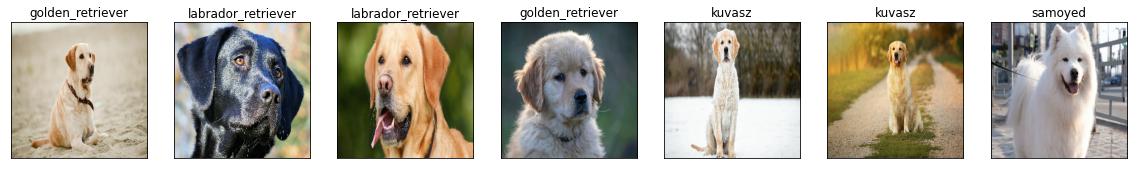

In [ ]:
# Check custom image predictions
plt.figure(figsize=(20, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 7, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)